In [ ]:
import keras

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
generator=keras.models.load_model('/content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /epoch 60/generator')

In [ ]:
#Initialising Hyper Parameters

#Uncomment one of the two below lines. For some reason, on some computers the first one works, while on others the second.
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import adam
import tensorflow as tf

import numpy as np
import keras

noise_dim = 100  # input dimension of random vector - the vector that goes into the generator

batch_size = 64   #How many images do we want to include in each batch
steps_per_epoch = 2500  #How many steps do we want to take per iteration of our training set (number of batches)
epochs = 60      #How many iterations of our training set do we want to do.

#change the below values to the dimensions of your image. The channels number refers to the number of colors
img_rows, img_cols, channels = 128, 128, 4

#These are the recommended values for the optimizer
optimizer = Adam(0.0002, 0.5)

In [ ]:
import matplotlib.pyplot as plt
def show_images(noise, size_fig):
    generated_images = generator.predict(noise)   #Create the images from the GAN.
    print("unique values before argmx",np.unique(generated_images))
    generated_images=np.argmax(generated_images,axis=3)
    unique_values=np.unique(generated_images)
    plt.figure(figsize=size_fig)
    
    for i, image in enumerate(generated_images):
        plt.subplot(size_fig[0], size_fig[1], i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)))    #If the image is grayscale, as in our case, then we will reshape the output in the following way.
                                                                            #Also, we set the coloring to grayscale so that it doesn't look like it came out of an infrared camera :)
        else:
            plt.imshow(image.reshape((img_rows, img_cols)))
        plt.axis('off')
    
    plt.tight_layout()   #Tight layout so that all of the generated images form a nice grid
    plt.show()
    return unique_values

unique values before argmx [-0.94362634 -0.9181654  -0.8465846  ...  0.9999999   0.99999994
  1.        ]


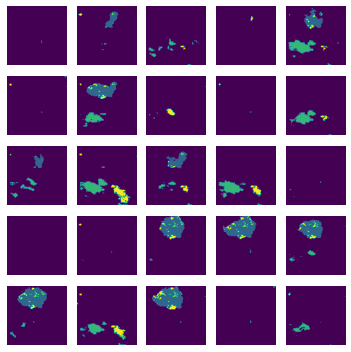

In [ ]:
noise = np.random.normal(0, 1, size=(25, noise_dim))
a=show_images(noise, (5, 5))


In [ ]:
a

array([0, 1, 2, 3])

In [ ]:
cat=tf.keras.utils.to_categorical(generated_images)
cat.shape, np.unique(cat)

((25, 128, 128, 4), array([0., 1.], dtype=float32))

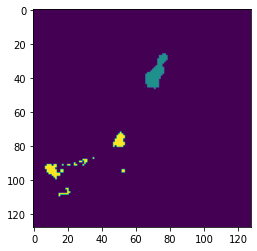

In [ ]:
plt.imshow(generated_images[6])

In [ ]:
output='/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/'

In [ ]:
import matplotlib

In [ ]:
a=generated_images[7]

In [ ]:
counter=6000

In [ ]:
counter

6000

In [ ]:
matplotlib.image.imsave(output+str(counter)+'.png', a)

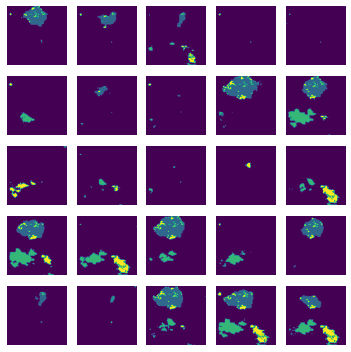

In [ ]:
noise = np.random.normal(0, 1, size=(25, noise_dim))
show_images(noise, (5, 5))

In [ ]:
generated_images.shape

(25, 128, 128, 4)

In [ ]:
np.unique(generated_images)

array([-0.9772681 , -0.9573337 , -0.8967292 , ...,  0.9999999 ,
        0.99999994,  1.        ], dtype=float32)

In [ ]:
im_list=[]
for i in range(40):
  noise = np.random.normal(0, 1, size=(25, noise_dim))
  generated_images = generator.predict(noise)   #Create the images from the GAN.
 
  for j in range(generated_images.shape[0]):
    a=generated_images[j]
    im_list.append(a)
    
    counter=counter+1



In [ ]:
img_arr=np.asarray(im_list)
img_arr.shape

(1000, 128, 128, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
np.save(output+str(counter),img_arr)

In [ ]:
counter

10000

**Lets generate the MRI of these 3000 masks.**

In [ ]:
first_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/1001.npy')
first_arr.shape

(1000, 128, 128, 4)

In [ ]:
sec_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/4000.npy')

In [ ]:
third_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/5000.npy')

In [ ]:
first_arr_maxed=np.argmax(first_arr,axis=3)
first_arr_maxed.shape

(1000, 128, 128)

In [ ]:
np.unique(first_arr_maxed)

array([0, 1, 2, 3])

In [ ]:
first_arr_cat=tf.keras.utils.to_categorical(
    first_arr_maxed, num_classes=4)

In [ ]:
first_arr_cat.shape

(1000, 128, 128, 4)

In [ ]:
np.unique(first_arr_cat)

array([0., 1.], dtype=float32)

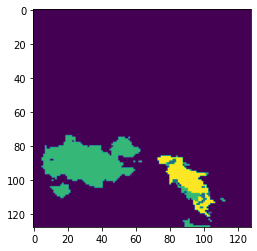

In [ ]:
rand=32
plt.imshow(first_arr_maxed[rand])

**second array reshape**

In [ ]:
sec_arr.shape

(1000, 128, 128, 4)

In [ ]:
sec_arr_maxed=np.argmax(sec_arr,axis=3)
sec_arr_maxed.shape

(1000, 128, 128)

In [ ]:
np.unique(sec_arr_maxed)

array([0, 1, 2, 3])

In [ ]:
second_arr_cat=tf.keras.utils.to_categorical(
    sec_arr_maxed, num_classes=4)

In [ ]:
second_arr_cat.shape

(1000, 128, 128, 4)

In [ ]:
np.unique(second_arr_cat)

array([0., 1.], dtype=float32)

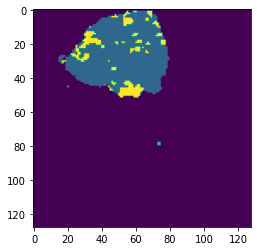

In [ ]:
rand=32
plt.imshow(sec_arr_maxed[rand])

**3rd array processing**

In [ ]:
third_arr_maxed=np.argmax(third_arr,axis=3)

In [ ]:
third_arr_maxed.shape

(1000, 128, 128)

In [ ]:
np.unique(third_arr_maxed)

array([0, 1, 2, 3])

**all remaining arrays**

In [ ]:
forth_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/7000.npy')

In [ ]:
fifth_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/8000.npy')

In [ ]:
sixeth_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/9000.npy')

In [ ]:
seventh_arr=np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/10000.npy')

In [ ]:
forth_arr.shape,fifth_arr.shape,sixeth_arr.shape

((1000, 128, 128, 4), (1000, 128, 128, 4), (1000, 128, 128, 4))

In [ ]:
forth_arr=np.argmax(forth_arr,axis=3)
fifth_arr=np.argmax(fifth_arr,axis=3)
sixeth_arr=np.argmax(sixeth_arr,axis=3)

In [ ]:
seventh_arr=np.argmax(seventh_arr,axis=3)

**let combine all the arrays**

In [ ]:
first_arr_maxed.shape,sec_arr_maxed.shape,third_arr_maxed.shape,forth_arr.shape,fifth_arr.shape,sixeth_arr.shape,seventh_arr.shape

((1000, 128, 128),
 (1000, 128, 128),
 (1000, 128, 128),
 (1000, 128, 128),
 (1000, 128, 128),
 (1000, 128, 128),
 (1000, 128, 128))

In [ ]:
cat=0

In [ ]:
cat=np.concatenate((first_arr_maxed, sec_arr_maxed,third_arr_maxed,forth_arr,fifth_arr,sixeth_arr,seventh_arr,))
 

In [ ]:
cat.shape

(7000, 128, 128)

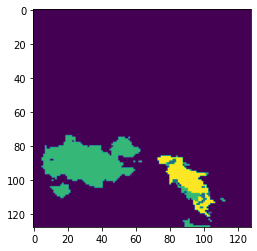

In [ ]:
plt.imshow(first_arr_maxed[32])

In [ ]:
32+1000

1032

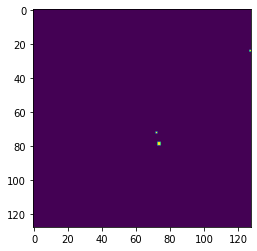

In [ ]:
plt.imshow(cat[1031])

In [ ]:
np.unique(cat)

array([0, 1, 2, 3])

In [ ]:
concat_categorical=tf.keras.utils.to_categorical(cat)

In [ ]:
concat_categorical.shape

(7000, 128, 128, 4)

In [ ]:
path='/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/'

In [ ]:
counter='7000_generated_array'

In [ ]:
np.save(path+counter,concat_categorical)

In [ ]:
agred_max_arr=np.argmax(concat_categorical,axis=3)
agred_max_arr.shape

(3000, 128, 128)

**lets load the Cgans-generator and give the data to the cgans generator**

In [ ]:
c_gan_generator=keras.models.load_model('/content/drive/MyDrive/Brain_tumor_Segmentation/huzaifa_data/Models/Models/C_Gans_Generator/CGAN_model_generator.h5')

In [ ]:
confined_array=concat_categorical[:6976]

In [ ]:
concat_categorical.shape

(7000, 128, 128, 4)

In [ ]:
np.save(path+'7000_masks',confined_array)

In [ ]:
confined_array.shape[0]

6976

In [ ]:
mri_pred=c_gan_generator.predict(confined_array)

In [ ]:
mri_pred.shape

(6976, 128, 128, 1)

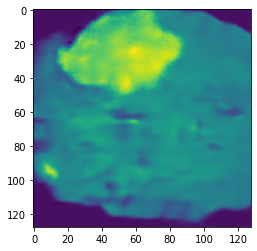

In [ ]:
plt.imshow(mri_pred[6451,:,:,0])

In [ ]:
plt.imshow(mri_pred[43,:,:,0])

In [ ]:
np.unique(mri_pred)

array([-0.47641027, -0.34724396, -0.3454686 , ...,  0.9999998 ,
        0.9999999 ,  1.        ], dtype=float32)

In [ ]:
agred_max_arr=np.argmax(concat_categorical,axis=3)

In [ ]:
agred_max_arr.shape

(3000, 128, 128)

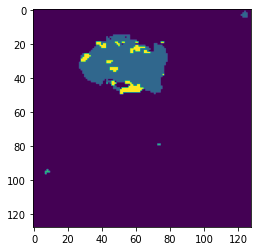

In [ ]:
plt.imshow(agred_max_arr[54])

**lets convert the labels to mris**

In [ ]:
for i in range(confined_array.shape[0]):
  

In [ ]:
pred=c_gan_generator.predict(confined_array)

In [ ]:
pred.shape

(2944, 128, 128, 1)

In [ ]:
np.unique(pred)

array([-0.3472447 , -0.34546947, -0.31102824, ...,  0.9999998 ,
        0.9999999 ,  1.        ], dtype=float32)

In [ ]:
np.save(path+'7000_MRI',mri_pred)

In [ ]:
np.max(pred)

1.0

In [ ]:
np.min(pred)

-0.3472447

In [ ]:
path

'/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/'